<div style="border: 2px solid RGB(200,150,100);" >
<div style="display: flex; font-family: Verdana; background-color: RGB(200,150,200);" >
  <h1 style="margin: auto; padding: 20px; "> Projet: SEGMENTATION DES CLIENTS DU SITE OLIST ! </h1>
</div>

<h2 style="padding: 10px; font-family: Verdana; "> Exploratory Data Analysis and RFM Segmentation </h2>

### Sommaire
###  <a style="padding: 10px; font-family: Verdana; " href="#AF"> 1. Chargement, Analyse de la forme et fusion des fichiers</a>
###  <a style="padding: 10px; font-family: Verdana; " href="#F"> 2. Analyse du fond: Quelques tendances </a>
###  <a style="padding: 10px; font-family: Verdana; " href="#FA"> 3. Segmentation RFM </a>
</div>

In [1]:
!pip install missingno

### Importation des librairies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import date
from dateutil.relativedelta import relativedelta
import missingno as msno
%config IPCompleter.greedy=True  
%matplotlib inline

In [3]:
# Option d'affichage
pd.set_option("display.max_rows", 2000)
pd.set_option("display.max_columns", 2000)

<div style="border: 1px solid RGB(200,150,100);" >
    <h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); "> <a id="AF"> 1. Chargement, Analyse de la forme et fusion des fichiers </a></h3>
</div>

### Importation des fichiers au seins des DataFrames

In [4]:
geolocations = pd.read_csv("Dataolist/olist_geolocation_dataset.csv")
orders = pd.read_csv("Dataolist/olist_orders_dataset.csv")
products = pd.read_csv("Dataolist/olist_products_dataset.csv")
sellers = pd.read_csv("Dataolist/olist_sellers_dataset.csv")
reviews = pd.read_csv("Dataolist/olist_order_reviews_dataset.csv")
items = pd.read_csv("Dataolist/olist_order_items_dataset.csv")
customers = pd.read_csv("Dataolist/olist_customers_dataset.csv")
payments = pd.read_csv("Dataolist/olist_order_payments_dataset.csv")
category = pd.read_csv("Dataolist/product_category_name_translation.csv")

### Analyse de la forme des Dataframes
#### a) Geolocalisations

In [5]:
display(geolocations.head())
display(geolocations.dtypes)
display(geolocations.shape)
display(geolocations.isna().sum())
display(geolocations.nunique())
display(geolocations.describe())

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


geolocation_zip_code_prefix      int64
geolocation_lat                float64
geolocation_lng                float64
geolocation_city                object
geolocation_state               object
dtype: object

(1000163, 5)

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

geolocation_zip_code_prefix     19015
geolocation_lat                717360
geolocation_lng                717613
geolocation_city                 8011
geolocation_state                  27
dtype: int64

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02



**Observation:**

- On compte 1000163 localisations carracterises par le zip code, la latitude, la longitude, la ville et l'Etat associe ;
- Type variable attendu et conformes ;
- Aucune valeur manquante ;


In [6]:
# Detection des doublons 
geolocations.duplicated().sum()

261831

In [7]:
# Suppression des doublons 
geolocations = geolocations.drop_duplicates()

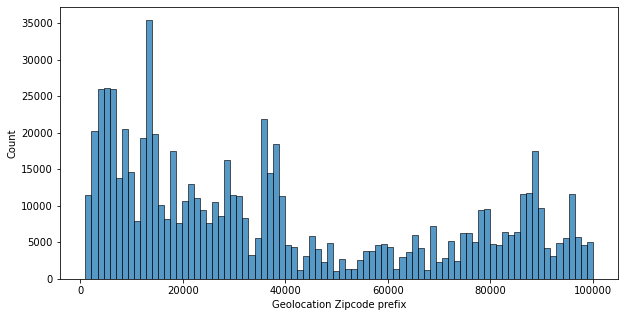

In [8]:
# Distribution de la variable zip code
plt.figure(figsize=(10, 5))
sns.histplot(geolocations['geolocation_zip_code_prefix'])
plt.xlabel('Geolocation Zipcode prefix')
plt.show()

C:\Users\DELL LATITUDE 7470\Documents\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


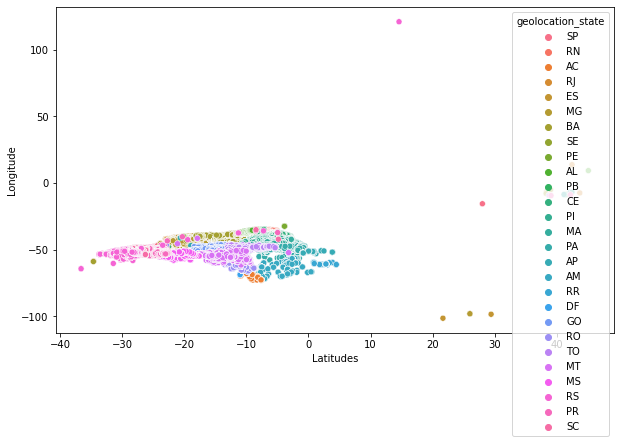

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=geolocations,
                x='geolocation_lat',
                y='geolocation_lng', hue="geolocation_state",)
plt.xlabel('Latitudes')
plt.ylabel('Longitude')
plt.show()

**Remarque:**
Nous remarquons d'après la représentation des coordonnées géographiques, la présence des valeurs aberrantes. Nous allons les supprimer par la suite. 

In [10]:
# Suppression des valeurs aberentes
geolocations = geolocations[geolocations["geolocation_lat"].between(-35, 5)]
geolocations = geolocations[geolocations["geolocation_lng"].between(-75, -33)]

C:\Users\DELL LATITUDE 7470\Documents\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


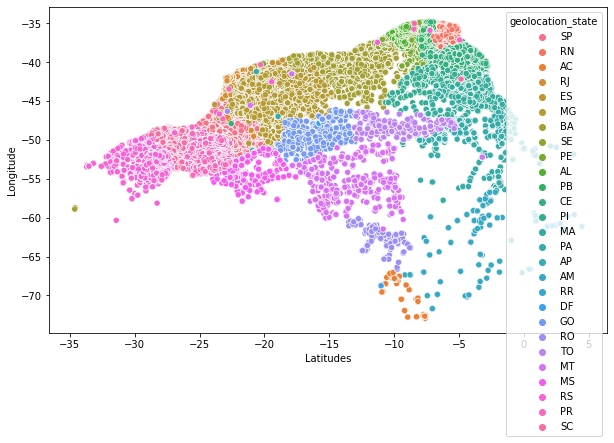

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=geolocations,
                x='geolocation_lat',
                y='geolocation_lng', hue="geolocation_state",)
plt.xlabel('Latitudes')
plt.ylabel('Longitude')
plt.show()

In [12]:
geolocations              

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000155,99965,-28.180655,-52.034367,agua santa,RS
1000156,99950,-28.072188,-52.011272,tapejara,RS
1000157,99950,-28.068864,-52.012964,tapejara,RS
1000158,99950,-28.068639,-52.010705,tapejara,RS


In [13]:
# 
geolocations.drop(columns=["geolocation_city", "geolocation_state"], inplace=True)
geolocations = geolocations.groupby(["geolocation_zip_code_prefix"], as_index=False).agg(
    {"geolocation_lat": "mean", "geolocation_lng": "mean"}
)

In [14]:
geolocations

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
0,1001,-23.550227,-46.634039
1,1002,-23.547657,-46.634991
2,1003,-23.549000,-46.635582
3,1004,-23.549829,-46.634792
4,1005,-23.549547,-46.636406
...,...,...,...
19005,99960,-27.953722,-52.025511
19006,99965,-28.183372,-52.039850
19007,99970,-28.343920,-51.874988
19008,99980,-28.389500,-51.843122


#### b) Orders/les commandes

In [15]:
display(orders.head())
display(orders.dtypes)
display(orders.shape)
display(orders.isna().sum())
display(orders.nunique())
display(orders.describe())

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

(99441, 8)

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
order_delivered_carrier_date     81018
order_delivered_customer_date    95664
order_estimated_delivery_date      459
dtype: int64

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


<AxesSubplot:>

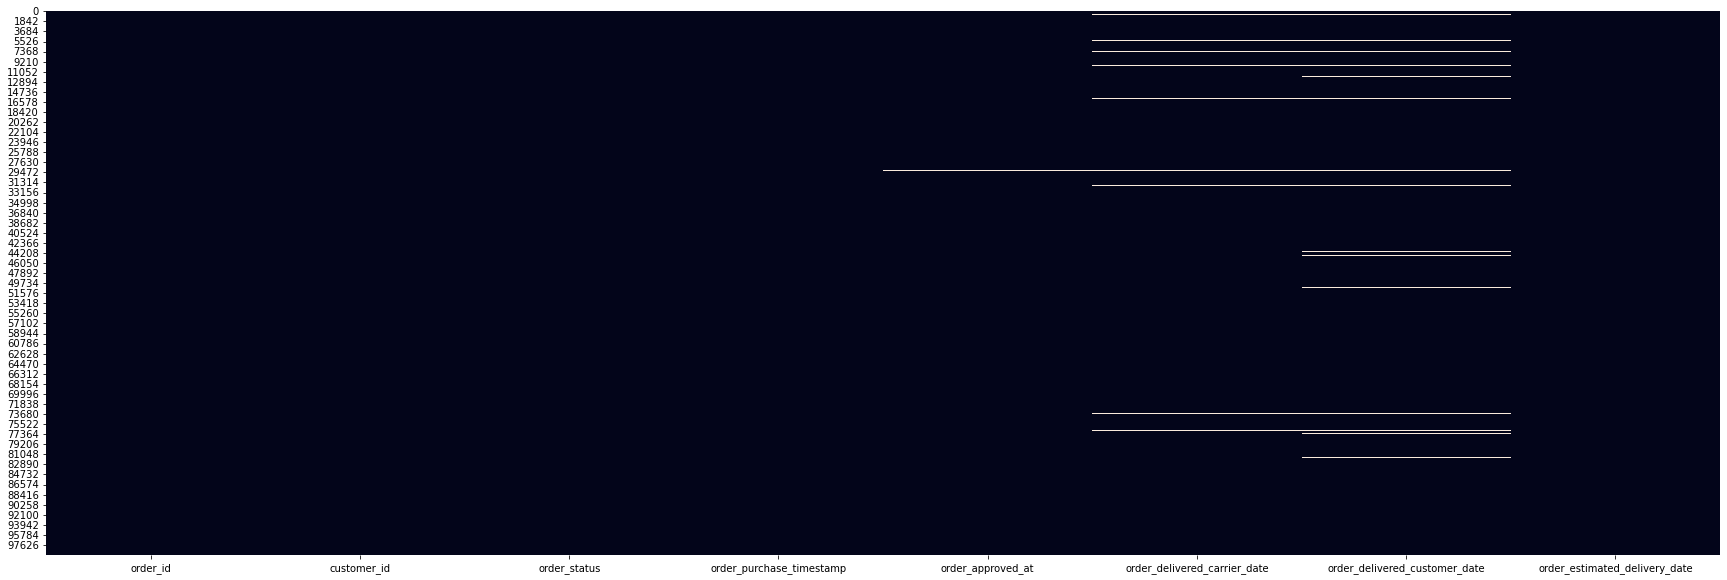

In [16]:
# Visualisation graphique des valeurs manquantes (nan)
plt.figure(figsize=(30,10))
sns.heatmap(orders.isna(), cbar = False)

**Observations:**
- Dans ce dataset, il y a toute information qui concerne la commande.
- Il y a plusieurs données sur les dates:  
   - order_purchase_timestamp: horodatage de l'achat de la commande
   - order_estimated_delivery_date : date estimé pour la livraison
   - order_approved_at : indique quand la commande est approuvée. Puisqu'il y a des données manquantes, nous mettons comme hypothèse que la commande est approuvée après peux de temps de la date d'achat. Si cette hypothèse est vérifiée, nous allons remplacer les valeurs manquantes par la order_purchase_timestamp.  
   - order_delivered_carrier_date: date de livraison de la commande au partenaire logistique
   - order_delivered_customer_date: date actuelle de livraison au client  
   
Ce qui nous interesse dans ces données, afin d'extraire le RFM, c'est orderID, custumerID, order_purchase_timestamp. 

In [17]:
# conversion des données date de object vers datetime
orders["order_purchase_timestamp"] = pd.to_datetime(orders["order_purchase_timestamp"])
orders["order_approved_at"] = pd.to_datetime(orders["order_approved_at"])
orders["order_delivered_carrier_date"] = pd.to_datetime(orders["order_delivered_carrier_date"])
orders["order_delivered_customer_date"] = pd.to_datetime(orders["order_delivered_customer_date"])
orders["order_estimated_delivery_date"] = pd.to_datetime(orders["order_estimated_delivery_date"])

In [18]:
# vérification des différents status des commandes
orders["order_status"].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

<AxesSubplot:ylabel='order_status'>

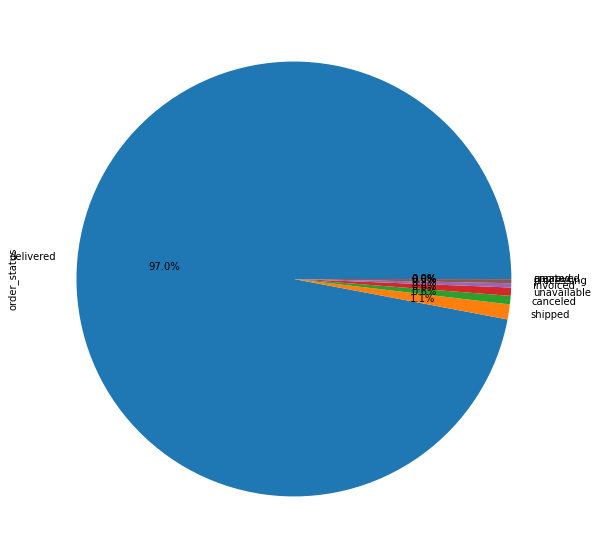

In [19]:
# proportion des status de commandes sous forme de camembert
plt.figure(figsize=(12, 10))
orders["order_status"].value_counts().plot.pie(autopct="%1.1f%%")

In [24]:
orders = orders[(orders['order_status'] == 'delivered')]
orders.shape

(96478, 8)

**Sélection des variables utiles:**    
Pour ce dataframe, nous allons garder les variables orderID, custumerID, order_purchase_timestamp. Nous allons renommer la variable 'order_purchase_timestamp' afin de simplifier son appel. 

In [25]:
orders = orders[["order_id", "customer_id", "order_purchase_timestamp"]]
orders.columns

Index(['order_id', 'customer_id', 'order_purchase_timestamp'], dtype='object')

In [27]:
# renommer 'order_purchase_timestamp'
orders = orders.rename(columns={"order_purchase_timestamp": "order_date"})

<AxesSubplot:>

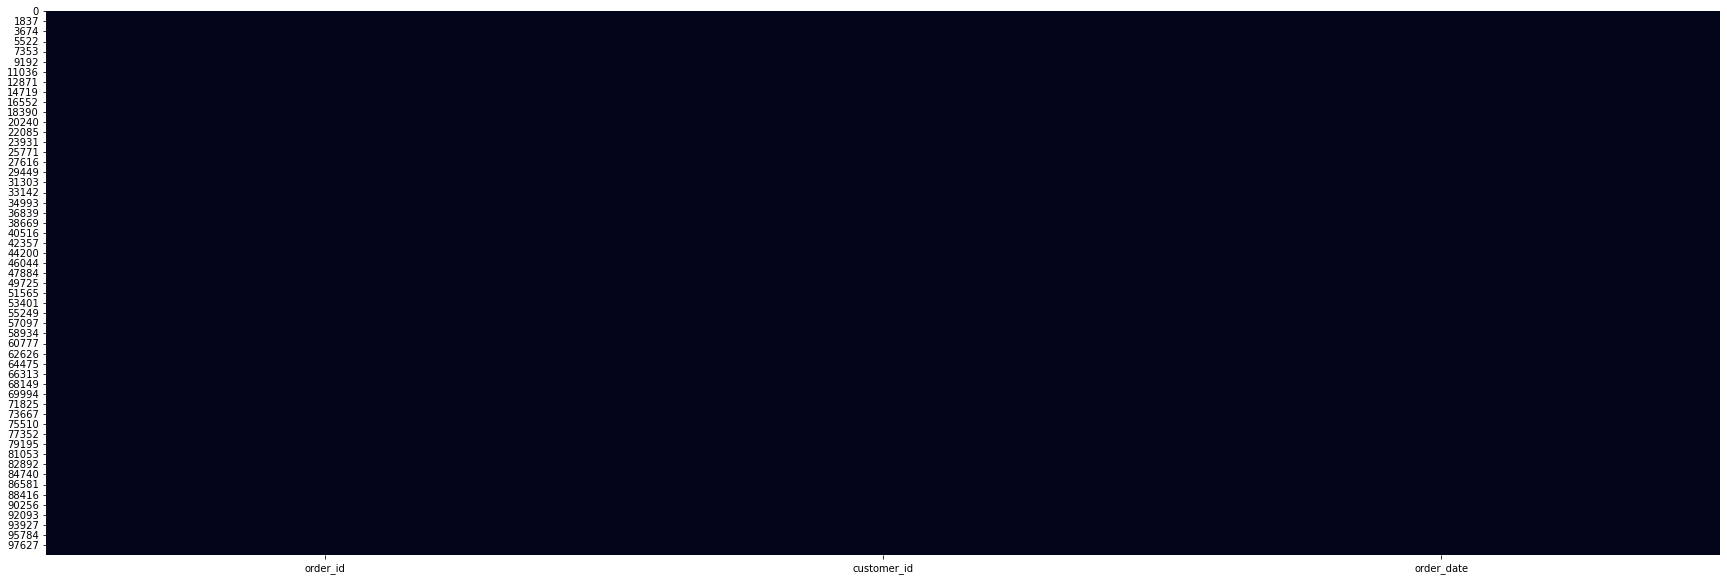

In [28]:
# Visualisation graphique des valeurs manquantes (nan)
plt.figure(figsize=(30,10))
sns.heatmap(orders.isna(), cbar = False)

#### c) Products/les produits

In [29]:
display(products.head())
display(products.dtypes)
display(products.shape)
display(products.isna().sum())
display(products.nunique())
display(products.describe())

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


product_id                     object
product_category_name          object
product_name_lenght           float64
product_description_lenght    float64
product_photos_qty            float64
product_weight_g              float64
product_length_cm             float64
product_height_cm             float64
product_width_cm              float64
dtype: object

(32951, 9)

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

product_id                    32951
product_category_name            73
product_name_lenght              66
product_description_lenght     2960
product_photos_qty               19
product_weight_g               2204
product_length_cm                99
product_height_cm               102
product_width_cm                 95
dtype: int64

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


**Sélection des variables utiles**     

Pour le moment, nous allons garder, pour ce dataframe, les variables: product_id et product_category_name

In [30]:
products = products[["product_id", "product_category_name"]]

d) Sellers/les vendeurs

In [31]:
display(sellers.head())
display(sellers.dtypes)
display(sellers.shape)
display(sellers.isna().sum())
display(sellers.nunique())
display(sellers.describe())

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


seller_id                 object
seller_zip_code_prefix     int64
seller_city               object
seller_state              object
dtype: object

(3095, 4)

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

seller_id                 3095
seller_zip_code_prefix    2246
seller_city                611
seller_state                23
dtype: int64

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


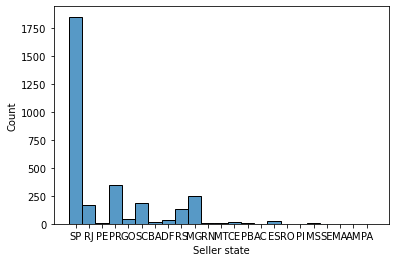

In [32]:
plt.figure()
sns.histplot(data=sellers, x='seller_state')
plt.xlabel('Seller state')
plt.show()


**Résumé du fichier : sellers**

- Contient 3095 individus et 4 variables :

    - seller_id (cat.) : identifiant du vendeur
    - seller_zip_code_prefix (num.) : code postal du vendeur (préfixe)
    - seller_city (cat.) : ville du vendeur
    - seller_state (cat.) : état/région du vendeur
- Aucune donnée manquante (remplissage 100%)
- La majorité des vendeurs sont dans la région de Sao Paulo


#### e) Reviews/ les commentaires

In [33]:
display(reviews.head())
display(reviews.dtypes)
display(reviews.shape)
display(reviews.isna().sum())
display(reviews.nunique())
display(reviews.describe())

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


review_id                  object
order_id                   object
review_score                int64
review_comment_title       object
review_comment_message     object
review_creation_date       object
review_answer_timestamp    object
dtype: object

(99224, 7)

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

review_id                  98410
order_id                   98673
review_score                   5
review_comment_title        4527
review_comment_message     36159
review_creation_date         636
review_answer_timestamp    98248
dtype: int64

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


C:\Users\DELL LATITUDE 7470\Documents\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='review_score', ylabel='Density'>

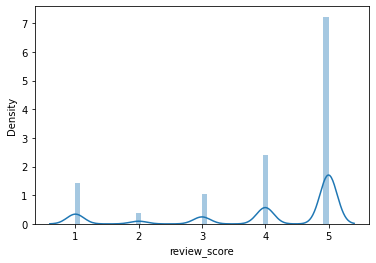

In [34]:
sns.distplot(reviews["review_score"])

<AxesSubplot:>

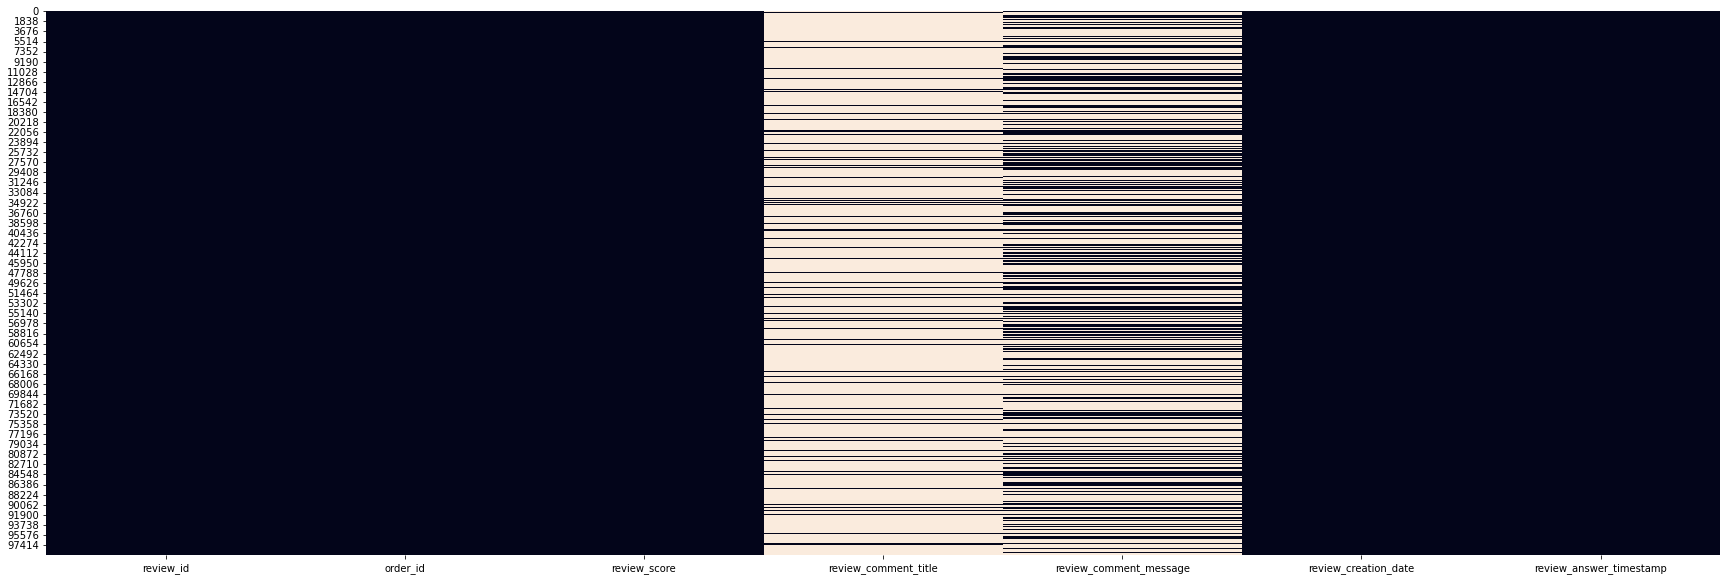

In [35]:
# Visualisation graphique des valeurs manquantes (nan)
plt.figure(figsize=(30,10))
sns.heatmap(reviews.isna(), cbar = False)

In [36]:
reviews = reviews[["review_id", "order_id", "review_score"]]

#### f) Fichier Items

In [37]:
display(items.head())
display(items.dtypes)
display(items.shape)
display(items.isna().sum())
display(items.nunique())
display(items.describe())

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

(112650, 7)

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

order_id               98666
order_item_id             21
product_id             32951
seller_id               3095
shipping_limit_date    93318
price                   5968
freight_value           6999
dtype: int64

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


**Observation:**

Le dataframe "items" contient les variables suivantes :

    - order_id: identifiant de la commande
    - order_item_id: numéro séquentiel identifiant le nombre d'articles inclus dans le même ordre.
    - product_id: identifiant du produit
    - seller_id: identifiant du vendeur
    - shipping_limit_date: la date limite dans laquelle le vendeur expédie la commande au partenaire logistique.
    - price: le prix de l'article
    - freight_value: frais de transport des articles (si une commande a plus d'un article, le frais de transport est répartie entre les articles)

<AxesSubplot:xlabel='price', ylabel='Density'>

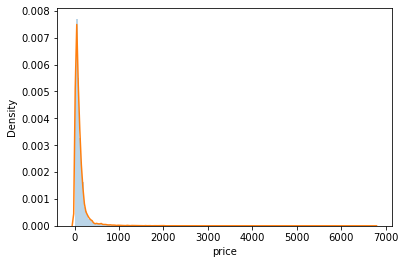

In [38]:
# verifions maintenant la variation des prix des commandes
plt.hist(items["price"], alpha=0.3, bins=200, density=True)
sns.kdeplot(items["price"])

(0.0, 1000.0)

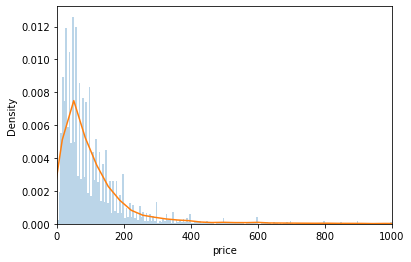

In [39]:
# nous faisons un zoom sur l'intervalle des prix [0, 1000]
plt.hist(items["price"], alpha=0.3, range=(0, 1000), bins=200, density=True)
sns.kdeplot(items["price"])
plt.xlim(0, 1000)

#### g) Customers / Les Clients   

In [40]:
display(customers.head())
display(customers.dtypes)
display(customers.shape)
display(customers.isna().sum())
display(customers.nunique())
display(customers.describe())

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

(99441, 5)

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

customer_id                 99441
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
dtype: int64

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


**Observation:**

La table customers contient les variables suivantes :

    customer_id: identifiant de la commande. Chaque commande a un custumer_id. 
    customer_unique_id: identifiant du client.
    customer_zip_code_prefix: zip code du client
    customer_city: nom du cité de l'acheteur
    customer_state: état du client


#### h) Payments/ Les Payement  

In [41]:
display(payments.head())
display(payments.dtypes)
display(payments.shape)
display(payments.isna().sum())
display(payments.nunique())
display(payments.describe())

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


order_id                 object
payment_sequential        int64
payment_type             object
payment_installments      int64
payment_value           float64
dtype: object

(103886, 5)

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

order_id                99440
payment_sequential         29
payment_type                5
payment_installments       24
payment_value           29077
dtype: int64

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


C:\Users\DELL LATITUDE 7470\Documents\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL LATITUDE 7470\Documents\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


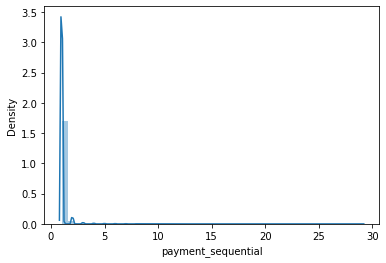

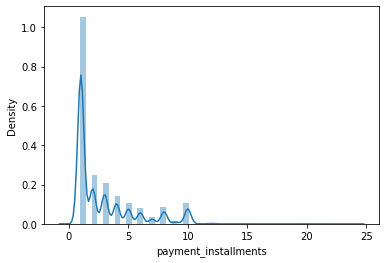

In [43]:
for col in payments.select_dtypes('int'):
    plt.figure()
    sns.distplot(payments[col])

<AxesSubplot:ylabel='payment_type'>

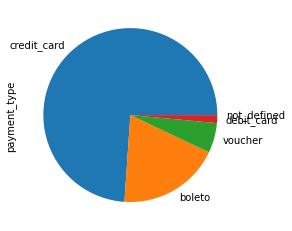

In [45]:
payments["payment_type"].value_counts().plot.pie()

In [46]:
# On supprime les paiements de type "not_defined"
payment_type = ["credit_card", "boleto", "voucher", "debit_card"]
payments = payments[payments["payment_type"].isin(payment_type)]

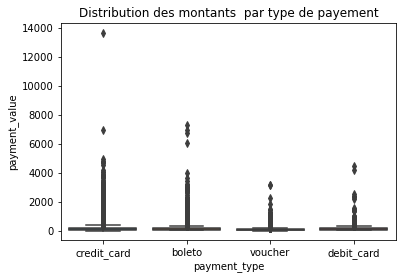

In [47]:
# Boxplot pour chaque type de paiement
plt.title("Distribution des montants  par type de payement")
sns.boxplot(data=payments, y="payment_value", x="payment_type")
plt.show()

**Observations:**

Le dataframe "payments" contient les variables suivantes :
   - order_id: identifiant d'une commande.
   - payment_sequential: Le client peut payer une commande avec plusieurs moyens. S'il le fait, une séquence sera créée pour accueillir tous les paiements.
   - payment_type: méthode de payment utilisée.
   - payment_installments: nombre de versements choisi par le client.
   - payment_value: montant payé.
   
 Nous remarquons que les montants les plus élevés sont payés par credit_card. Par contre, les montants les plus faibles sont payés par les voucher (bon de commande). 

####  j) Category / Les catégories

In [48]:
display(category.head())
display(category.dtypes)
display(category.shape)
display(category.isna().sum())
display(category.nunique())
display(category.describe())

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


product_category_name            object
product_category_name_english    object
dtype: object

(71, 2)

product_category_name            0
product_category_name_english    0
dtype: int64

product_category_name            71
product_category_name_english    71
dtype: int64

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


### Jointure des dataframes  et nettoyage
#### Jointure des données

Tout les dataframes sont liés par une clée pour faire la jointure. Ce shémas décrit tout les liens: 
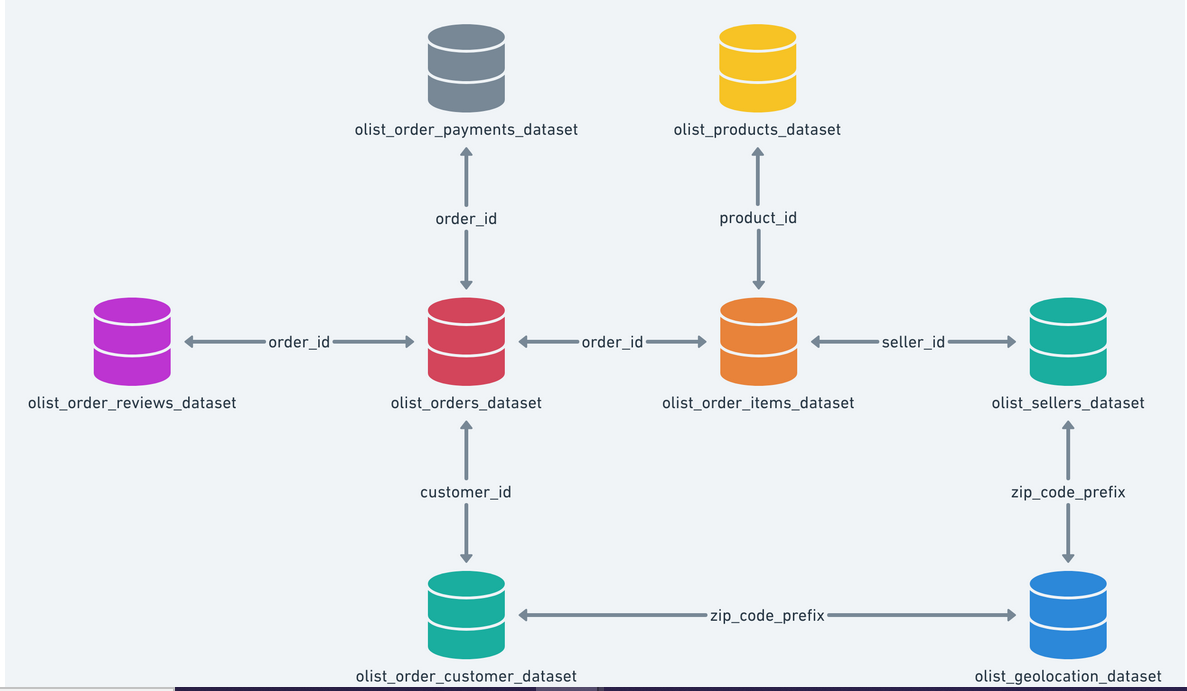


In [50]:
# Merger les autres dataframe qui ont dejà des clées en commun d'apres la figure ci dessus

df = customers.merge(orders, how='left', on='customer_id')

df = df.merge(reviews, how="left", on="order_id")

df = df.merge(payments, how="left", on="order_id")

df = df.merge(items, how="left", on="order_id")

df = df.merge(products, how="left", on="product_id")

df = df.merge(sellers, how="left", on="seller_id")


##### Merger le dataframe df avec geo pour récupérer seller_lat et seller_long

In [54]:
# creer une nouvelle variable dans df contenant le même identifiant que dans geo (geolocation_zip_code_prefix)
df["geolocation_zip_code_prefix"] = df["seller_zip_code_prefix"]
# merger les deux df
df = df.merge(geolocations, how="left", on="geolocation_zip_code_prefix")
# renommer les coordonnées du seller
df.rename(columns={"geolocation_lat": "seller_lat", "geolocation_lng": "seller_lng"}, inplace=True,)
# supprimer les variables 'geolocation_zip_code_prefix' et 'seller_zip_code_prefix'
df.drop(columns=["geolocation_zip_code_prefix", "seller_zip_code_prefix"], inplace=True)

##### Merger le dataframe df avec geo pour récupérer customer_lat et customer_long

In [56]:
# creer une nouvelle variable dans df contenant le même identifiant que dans geo (geolocation_zip_code_prefix)
df["geolocation_zip_code_prefix"] = df["customer_zip_code_prefix"]
# merger les deux df
df = df.merge(geolocations, how="left", on="geolocation_zip_code_prefix")
# renommer les coordonnées du seller
df.rename(columns={"geolocation_lat": "customer_lat", "geolocation_lng": "customer_lng"}, inplace=True,)
# supprimer les variables 'geolocation_zip_code_prefix' et 'seller_zip_code_prefix'
df.drop(columns=["geolocation_zip_code_prefix", "customer_zip_code_prefix"], inplace=True)

In [59]:
def haversine_distance(lat1, lon1, lat2, lon2):
   """
   calculer la distance haversine entre deux points. chaque point a une longitude et latitude.
    
   param lat1: premier point latitude
   param lon1: premier point longitude
   param lat2: Second point latitude
   param lon2: Second point longitude
    
   retour: distance entre les deux points en kilometres
   """
    
   r = 6371 # Planet earth radius in kilometres
   phi1 = np.radians(lat1)
   phi2 = np.radians(lat2)
   delta_phi = np.radians(lat2 - lat1)
   delta_lambda = np.radians(lon2 - lon1)
   a = np.sin(delta_phi / 2)**2 + np.cos(phi1) * np.cos(phi2) *   np.sin(delta_lambda / 2)**2
   res = r * (2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a)))

   return np.round(res, 2)

In [60]:
df['distance_clientVendeur'] = df.apply(
        lambda row : haversine_distance(row['customer_lat'], row['customer_lng'], row['seller_lat'], row['seller_lng']), axis = 1)


<AxesSubplot:>

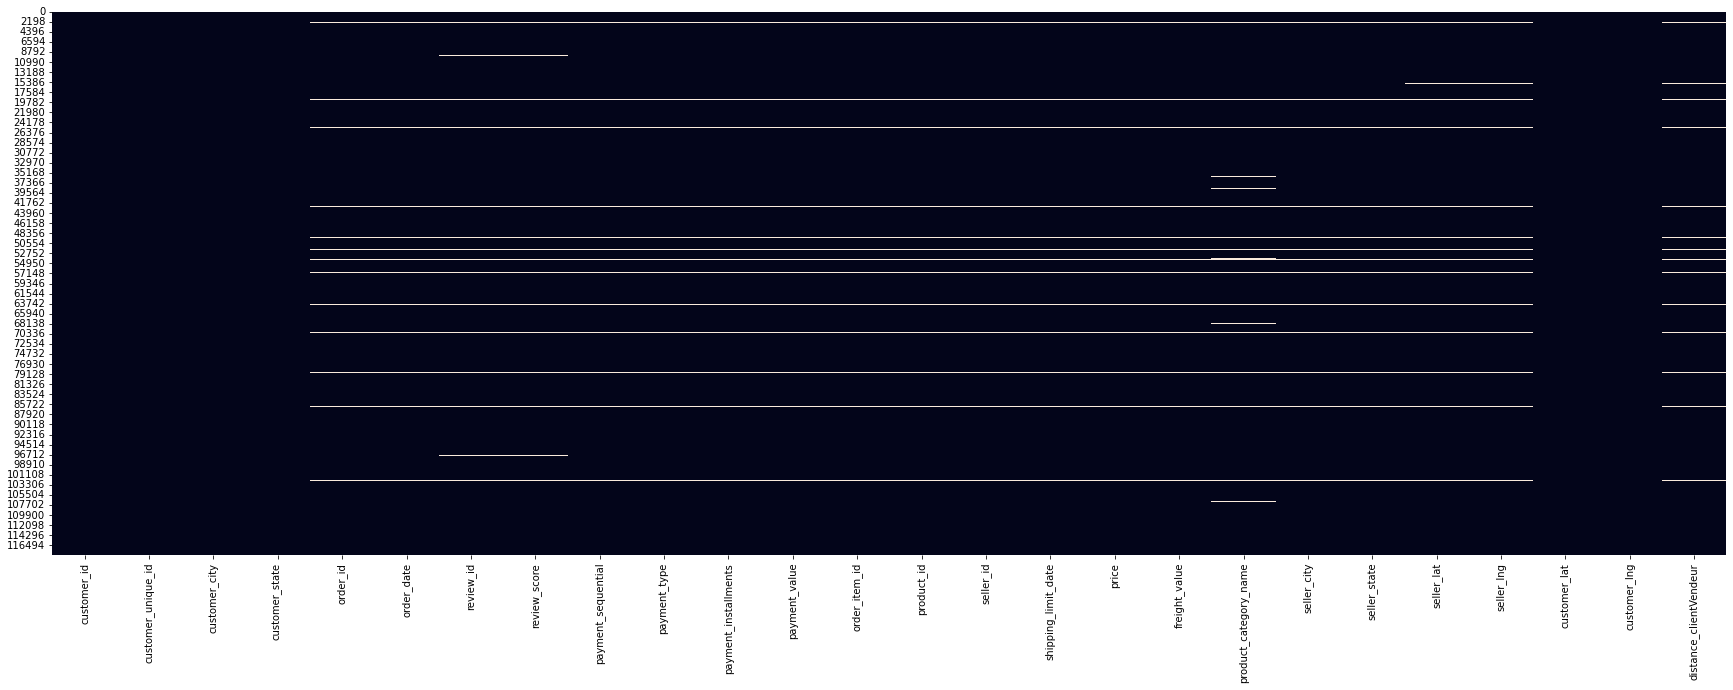

In [61]:
# Visualisation graphique des valeurs manquantes (nan)
plt.figure(figsize=(30,10))
sns.heatmap(df.isna(), cbar = False)

#### Imputation des valeurs manquantes   
Dans cette section, nous allons imputer les NaN. Avant de le faire, nous allons faire une sélection des variables qu'on va les utiliser pour la segmentation des clients. 


In [63]:
df = df[
    [
        "customer_id",
        "customer_unique_id",
        "order_id",
        "order_date",
        "review_score",
        "payment_sequential",
        "payment_type",
        "payment_installments",
        "payment_value",
        "freight_value",
        "distance_clientVendeur",
    ]
]

In [64]:
df

,customer_id,customer_unique_id,order_id,order_date,review_score,payment_sequential,payment_type,payment_installments,payment_value,freight_value,distance_clientVendeur
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,4.0,1.0,credit_card,2.0,146.87,21.88,348.67
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,2018-01-12 20:48:24,5.0,1.0,credit_card,8.0,335.48,46.48,413.82
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-19 16:07:45,5.0,1.0,credit_card,7.0,157.73,17.79,29.95
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,2018-03-13 16:06:38,5.0,1.0,credit_card,1.0,173.30,23.36,18.50
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29 09:51:30,5.0,1.0,credit_card,8.0,252.25,22.25,220.06
...,...,...,...,...,...,...,...,...,...,...,...
118681,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,6760e20addcf0121e9d58f2f1ff14298,2018-04-07 15:48:17,4.0,1.0,credit_card,6.0,88.78,13.88,357.88
118682,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,9ec0c8947d973db4f4e8dcf1fbfa8f1b,2018-04-04 08:20:22,5.0,1.0,credit_card,3.0,129.06,14.16,251.15
118683,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,fed4434add09a6f332ea398efd656a5c,2018-04-08 20:11:50,1.0,1.0,credit_card,5.0,56.04,19.04,2367.08
118684,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,e31ec91cea1ecf97797787471f98a8c2,2017-11-03 21:08:33,5.0,1.0,credit_card,2.0,711.07,22.07,999.04


**Imputation des variables numériques:**

Nous allons utiliser l'imputer KnnImputer qui permet de chercher les données semblables à l'échantillon dans lequel il nous manque une information. Il va par la suite remplacer la valeur manquante par la valeur des K échantillons les plus semblables.

In [67]:
# liste des variables numeriques/quantitatives ayant des nan
numeric_vars_toImpute = [
    "review_score",
    "freight_value",
    "distance_clientVendeur",
    "payment_value",
    "payment_installments",
    "payment_sequential",
]

In [68]:
#appliquer KNNImputer sur les variables quantitatives
from sklearn.impute import KNNImputer
num_imputer = KNNImputer(n_neighbors = 1)
df[numeric_vars_toImpute] = num_imputer.fit_transform(df[numeric_vars_toImpute])

C:\Users\DELL LATITUDE 7470\Documents\Anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


<AxesSubplot:>

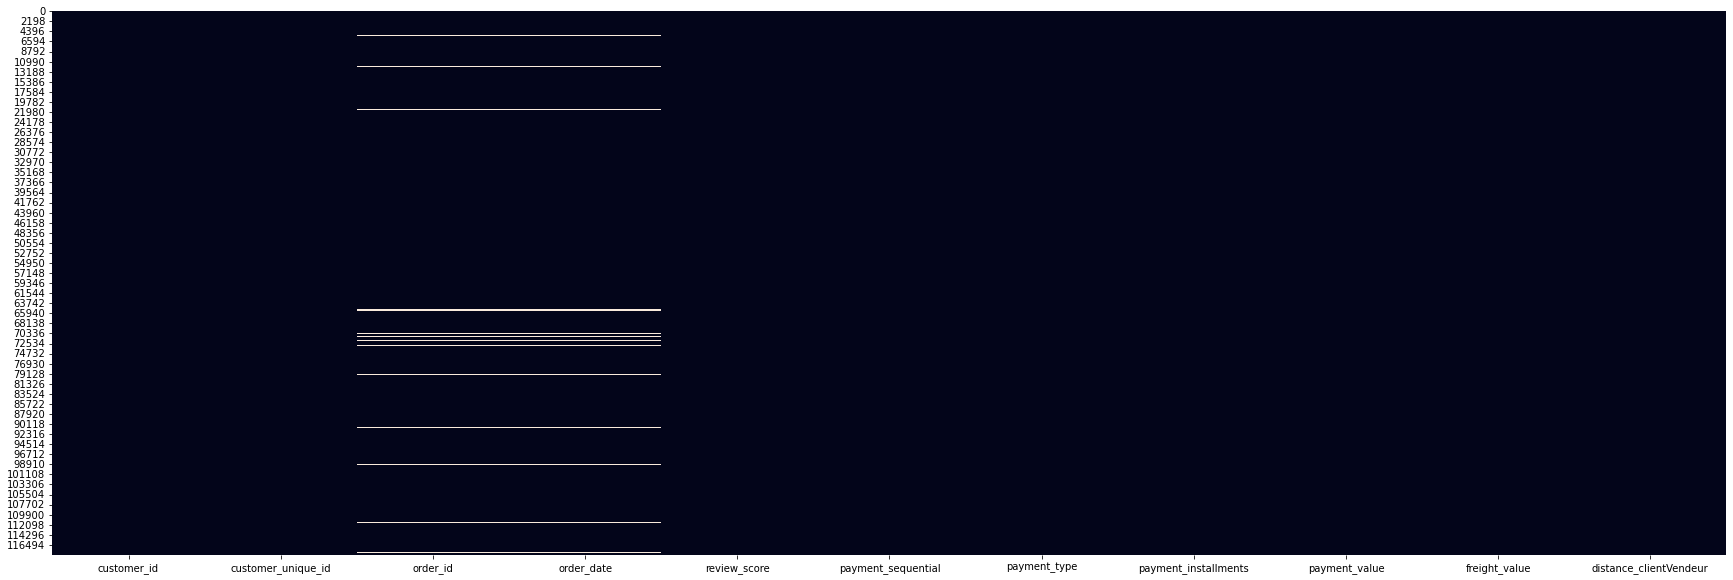

In [71]:
# Visualisation graphique des valeurs manquantes (nan)
plt.figure(figsize=(30,10))
sns.heatmap(df.isna(), cbar = False)

**Imputation des variables qualitatives:** 

Nous allons imputer les NaN des variables qualitatives par la valeur la plus fréquente en utilisant SimpleImputer.

In [70]:
# appliquer simpleImputer sur les données qualitatives
from sklearn.impute import SimpleImputer

quali_imputer = SimpleImputer(strategy="most_frequent")

df["payment_type"] = quali_imputer.fit_transform(df[["payment_type"]])

C:\Users\DELLLA~1\AppData\Local\Temp/ipykernel_14360/3610555693.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["payment_type"] = quali_imputer.fit_transform(df[["payment_type"]])


In [79]:
display(df.isna().sum())

customer_id                  0
customer_unique_id           0
order_id                  2963
order_date                2963
review_score                 0
payment_sequential           0
payment_type                 0
payment_installments         0
payment_value                0
freight_value                0
distance_clientVendeur       0
dtype: int64

In [80]:
df = df.dropna(axis=0)

<div style="border: 1px solid RGB(200,150,100);" >
    <h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); "> <a id="F"> 2. Analyses du fond: Quelques tendances </a></h3>
</div>

###  Analyses temporelles

Nous allons baser nos données sur le critère de temps. Pour celà, nous allons créer de nouvelles variables tout en décompactant la variable "order_date", rappelons qu'elle indique la date dans laquelle les commandes sont effectuées. Nous allons donc extraire l'heure, le jour, le jour de la semaine (valeur numérique entre [0 ,6], le mois, l'année, et nous allons aussi créer une autre variable booléenne (purchase_weekend) qui permet d'indiquer si oui ou non l'achat a été effectué pendant le weekend.

In [84]:
df["order_date"]

0        2017-05-16 15:05:35
1        2018-01-12 20:48:24
2        2018-05-19 16:07:45
3        2018-03-13 16:06:38
4        2018-07-29 09:51:30
                 ...        
118681   2018-04-07 15:48:17
118682   2018-04-04 08:20:22
118683   2018-04-08 20:11:50
118684   2017-11-03 21:08:33
118685   2017-12-19 14:27:23
Name: order_date, Length: 115723, dtype: datetime64[ns]

In [85]:
#recuperer l'heure
df['order_hour'] = df['order_date'].map(lambda d: d.hour)

#recuperer le jour
df['order_day'] = df['order_date'].map(lambda d: d.day)

#recuperer le jour de la semaine
df['order_weekday'] = df['order_date'].map(lambda d: d.dayofweek)

# le mois et l'annee
df['order_month'] = df['order_date'].map(lambda d: d.month)
df['order_year'] = df['order_date'].map(lambda d: d.year)

df["purchase_weekend"] = np.where(df["order_weekday"].isin([5, 6]), 1, 0)

C:\Users\DELLLA~1\AppData\Local\Temp/ipykernel_14360/2073802105.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['order_hour'] = df['order_date'].map(lambda d: d.hour)
C:\Users\DELLLA~1\AppData\Local\Temp/ipykernel_14360/2073802105.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['order_day'] = df['order_date'].map(lambda d: d.day)
C:\Users\DELLLA~1\AppData\Local\Temp/ipykernel_14360/2073802105.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

In [86]:
# verifier le contenu des colonnes
cols = [
    "order_date",
    "order_hour",
    "order_day",
    "order_weekday",
    "order_month",
    "order_year",
    "purchase_weekend",
]
df[cols]

,order_date,order_hour,order_day,order_weekday,order_month,order_year,purchase_weekend
0,2017-05-16 15:05:35,15,16,1,5,2017,0
1,2018-01-12 20:48:24,20,12,4,1,2018,0
2,2018-05-19 16:07:45,16,19,5,5,2018,1
3,2018-03-13 16:06:38,16,13,1,3,2018,0
4,2018-07-29 09:51:30,9,29,6,7,2018,1
...,...,...,...,...,...,...,...
118681,2018-04-07 15:48:17,15,7,5,4,2018,1
118682,2018-04-04 08:20:22,8,4,2,4,2018,0
118683,2018-04-08 20:11:50,20,8,6,4,2018,1
118684,2017-11-03 21:08:33,21,3,4,11,2017,0


####  Commandes par semaine
##### valeurs des commandes par jours de la semaine

([<matplotlib.axis.XTick at 0x1a5b38986d0>,
 [Text(0, 0, 'Lundi'),
  Text(1, 0, 'Mardi'),
  Text(2, 0, 'Mercredi'),
  Text(3, 0, 'Jeudi'),
  Text(4, 0, 'Vendredi'),
  Text(5, 0, 'Samedi'),
  Text(6, 0, 'Dimanche')])

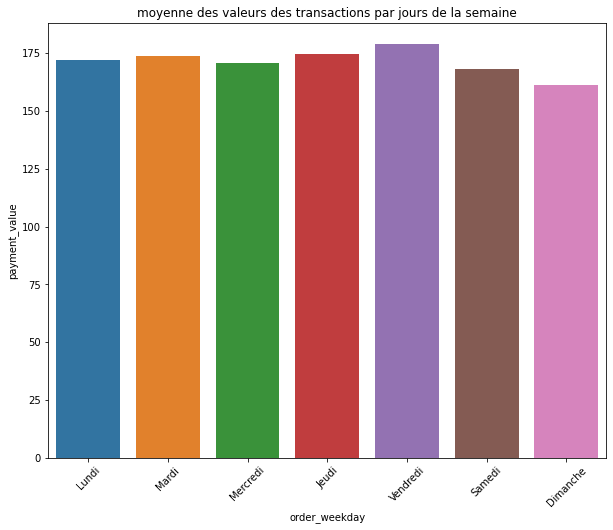

In [87]:
# Jours de la semaine
jr_semaine = ["Lundi", "Mardi", "Mercredi", "Jeudi", "Vendredi", "Samedi", "Dimanche"]

# Les données sont groupés par la variable 'order_weekday' et moyennés
payment_value_weekday = ( df.groupby("order_weekday")["payment_value"].mean().sort_values(ascending=False).reset_index())

# afficher la moyenne des montants des commandes pendant chaque jour de la semaine
fig = plt.figure(figsize=(10, 8))
sns.barplot(data=payment_value_weekday, x="order_weekday", y="payment_value")
plt.title("moyenne des valeurs des transactions par jours de la semaine")
plt.xticks(np.arange(7), jr_semaine, rotation=45)

--> Nous remarquons que c'est en vendredi que les commandes de valeurs les plus élevées s'effectuent.   

##### Nombre de commandes par jours de la semaine

([<matplotlib.axis.XTick at 0x1a5bb646280>,
 [Text(0, 0, 'Lundi'),
  Text(1, 0, 'Mardi'),
  Text(2, 0, 'Mercredi'),
  Text(3, 0, 'Jeudi'),
  Text(4, 0, 'Vendredi'),
  Text(5, 0, 'Samedi'),
  Text(6, 0, 'Dimanche')])

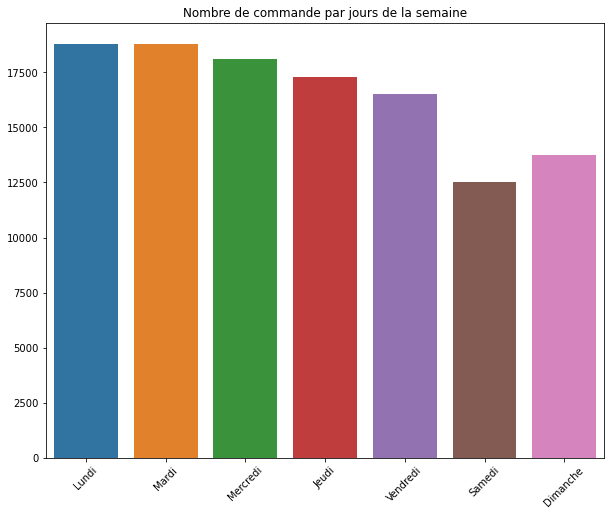

In [88]:
# calculons le nombre de commande par jour de semaine
order_in_a_weekday = df["order_weekday"].value_counts().sort_index()

# affichons un barplots des nombres de commandes par jour de semaine
fig = plt.figure(figsize=(10, 8))
sns.barplot(x=order_in_a_weekday.index, y=order_in_a_weekday.values)
plt.title("Nombre de commande par jours de la semaine")
plt.xticks(np.arange(7), jr_semaine, rotation=45)

--> Nous remarquons qu'il y a moins de commandes effectuées pendant le weekend.

#### Commandes par Mois
##### Valeurs des commandes par mois

([<matplotlib.axis.XTick at 0x1a5b5318370>,
 [Text(0, 0, 'Janvier'),
  Text(1, 0, 'Fevrier'),
  Text(2, 0, 'Mars'),
  Text(3, 0, 'Avril'),
  Text(4, 0, 'Mai'),
  Text(5, 0, 'Juin'),
  Text(6, 0, 'Juillet'),
  Text(7, 0, 'Aout'),
  Text(8, 0, 'Septembre'),
  Text(9, 0, 'Octobre'),
  Text(10, 0, 'Novembre'),
  Text(11, 0, 'Decembre')])

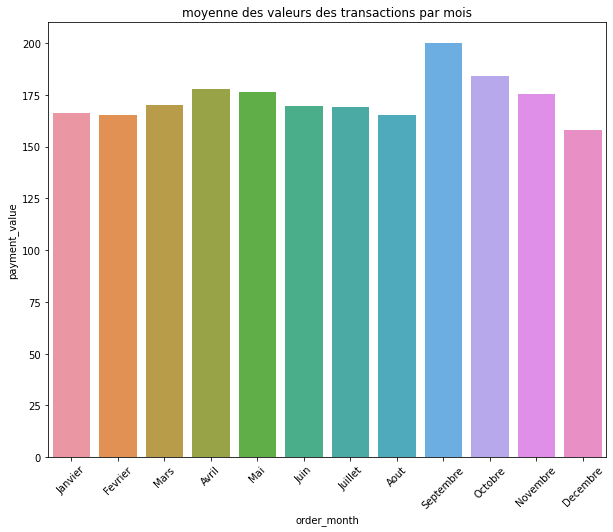

In [89]:
# Mois de l'année
mois = [
    "Janvier",
    "Fevrier",
    "Mars",
    "Avril",
    "Mai",
    "Juin",
    "Juillet",
    "Aout",
    "Septembre",
    "Octobre",
    "Novembre",
    "Decembre",
]

# Les données sont groupées par la variable 'order_month' et moyennés
payment_value_per_month = (df.groupby("order_month")["payment_value"].mean().sort_values(ascending=False).reset_index())

# afficher la moyenne des montants des commandes pendant chaque mois
fig = plt.figure(figsize=(10, 8))
sns.barplot(data=payment_value_per_month, x="order_month", y="payment_value")
plt.title("moyenne des valeurs des transactions par mois")
plt.xticks(np.arange(12), mois, rotation=45)

--> Nous remarquons que c'est dans le mois de Septembre que les commandes de valeurs les plus élevées sont faites.  

##### Nombre de commandes par mois

([<matplotlib.axis.XTick at 0x1a5b53cd430>,
 [Text(0, 0, 'Janvier'),
  Text(1, 0, 'Fevrier'),
  Text(2, 0, 'Mars'),
  Text(3, 0, 'Avril'),
  Text(4, 0, 'Mai'),
  Text(5, 0, 'Juin'),
  Text(6, 0, 'Juillet'),
  Text(7, 0, 'Aout'),
  Text(8, 0, 'Septembre'),
  Text(9, 0, 'Octobre'),
  Text(10, 0, 'Novembre'),
  Text(11, 0, 'Decembre')])

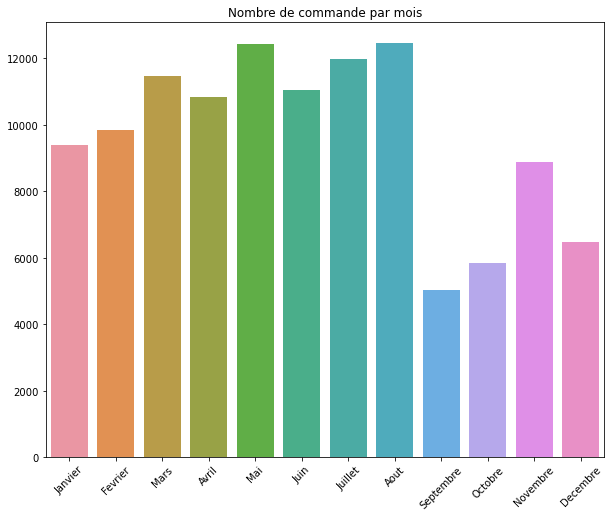

In [90]:
# calculons le nombre de commande par mois
order_in_a_month = df["order_month"].value_counts().sort_index()
order_in_a_month

# affichons un barplots des nombres de commandes par mois
fig = plt.figure(figsize=(10, 8))
sns.barplot(x=order_in_a_month.index, y=order_in_a_month.values)
plt.title("Nombre de commande par mois")
plt.xticks(np.arange(12), mois, rotation=45)

--> Nous remarquons que le nombre de commandes est plus bas est en mois de septembre malgrès que dans ce même mois sont aussi effectuées les commandes les plus chères. 

In [91]:
df.columns

Index(['customer_id', 'customer_unique_id', 'order_id', 'order_date',
       'review_score', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'freight_value',
       'distance_clientVendeur', 'order_hour', 'order_day', 'order_weekday',
       'order_month', 'order_year', 'purchase_weekend'],
      dtype='object')

#### Matrice de corrélation  

Les variables numériques que je vais garder pour analyser la corrélation entre eux sont: 

In [92]:
numeric_vars = [
    "order_date",
    "review_score",
    "payment_sequential",
    "payment_type",
    "payment_installments",
    "payment_value",
    "freight_value",
    "distance_clientVendeur",
]

df_toAnalyse = df[numeric_vars]
df_toAnalyse.columns

Index(['order_date', 'review_score', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'freight_value',
       'distance_clientVendeur'],
      dtype='object')

Text(0.5, 1.0, 'Matrice de corrélation entre les variables quantitatives')

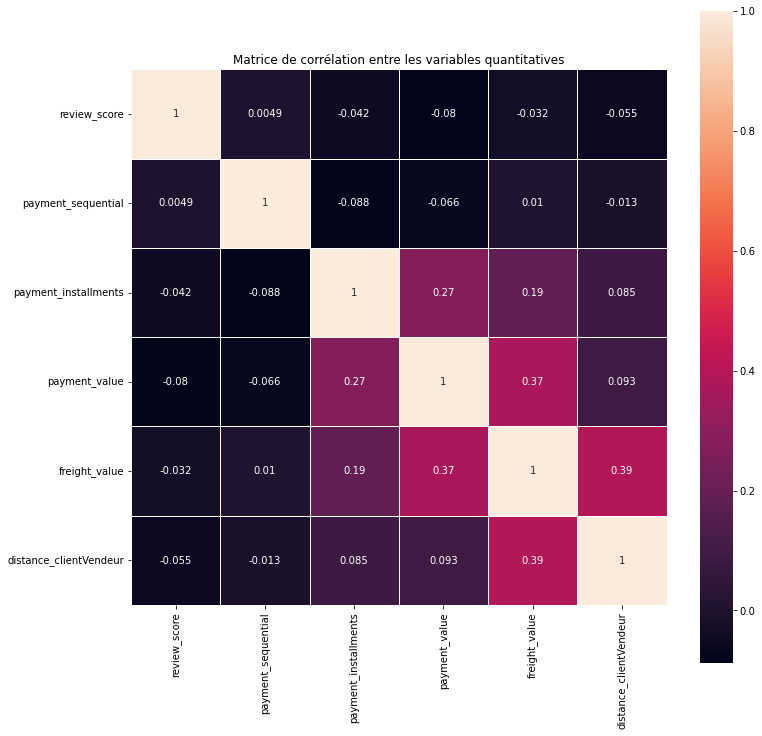

In [93]:
# corrélation entre toutes les variables quantitatives
corr_df = df_toAnalyse.corr(method="pearson")
plt.figure(figsize=(12, 12))
sns.heatmap(corr_df, annot=True, square=True, linewidths=0.5)
plt.title("Matrice de corrélation entre les variables quantitatives")
# plt.show()

--> selon la matrice, nous ne remarquons pas la présence de corrélation forte entre les variables. 

<div style="border: 1px solid RGB(200,150,100);" >
    <h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); "> <a id="FA"> 3. Segmentation RFM </a></h3>
</div>


Dans cette partie, nous allons essayer de segmenter les clients. Pour ce faire, nous allons calculer pour chaque client:  
  - R --> Récence: La proximité du dernier achat, comme par exemple, la durée depuis le dernier achat.  
  - F --> Fréquence: Récurrence des achats sur une période, comme par exemple le nombre d'achat sur la dernière année.  
  - M --> Montant: Dépenses des clients sur une période, comme par exemple la somme de tout les montants payés pendant la dernière année.  
  
### Calcul RFM
  Afin d'automatiser le calcul de RFM sur différentes périodes, nous allons créer une fonction pour ce faire.

In [95]:
# definir une fonction  pour calculer RFM
def calcul_rfm(df, date_debut, date_fin):
    """
    Les paramètres sont:
    -data: le dataframe qui contient obligatoirement 'customer_unique_id','order_date', et ''payment_value'
    date_debut: debut de la période pour calculer RFM
    - date_fin: fin de la periode pour calculer RFM
    valeur de retour : dataframe contenant les valeurs de RFM
    """

    # recuperer uniquement la partie de df dont la date de la commande est dans la période fixée
    test_df = df[df["order_date"].between(date_debut, date_fin)]

    # calculer récence

    # rajouter une nouvelle variable qui calcule le nombre de jour entre date de commande et date_fin
    test_df["recence_jours"] = test_df["order_date"].map(lambda d: (date_fin - d).days)

    # recuperer le nombre minimal de jours pour avoir la commande la plus récente
    df_recence = test_df[["customer_unique_id", "recence_jours"]]
    df_recence = df_recence.groupby("customer_unique_id")["recence_jours"].agg(["min"])

    # calculer frequence

    # calculons le nombre de order_id pour chaque client
    df_frequence = test_df[["customer_unique_id", "order_id"]]
    df_frequence = df_frequence.groupby("customer_unique_id")
    df_frequence = df_frequence.agg({"order_id": "nunique"})
    df_frequence = df_frequence.reset_index()

    # calculer montant

    # calculons le montant total de toutes les commandes effectuées par chaque client
    df_montant = test_df[["customer_unique_id", "payment_value"]]
    df_montant = df_montant.groupby("customer_unique_id")["payment_value"].agg(["sum"])

    # merger les trois df contenant les RFM
    df_recence = df_recence.merge(df_frequence, on="customer_unique_id", how="left")
    df_recence = df_recence.merge(df_montant, on="customer_unique_id", how="left")

    # renommer les colonnes
    df_RFM = df_recence
    df_RFM.rename(columns={"min": "recence", "order_id": "frequence", "sum": "montant"}, inplace=True,)
    return df_RFM

In [96]:
# definir l'intervalle de la periode dans laquelle on veut calculer RFM
import datetime

date_debut = datetime.datetime(2016, 1, 1)
date_fin = datetime.datetime(2018, 12, 31)

# calculer RFM
rfm_results = calcul_rfm(df, date_debut, date_fin)
rfm_results.head(10)

,customer_unique_id,recence,frequence,montant
0,0000366f3b9a7992bf8c76cfdf3221e2,234,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,237,1,27.19
2,0000f46a3911fa3c0805444483337064,660,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,444,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,411,1,196.89
5,0004bd2a26a76fe21f786e4fbd80607f,269,1,166.98
6,00050ab1314c0e55a6ca13cf7181fecf,254,1,35.38
7,00053a61a98854899e70ed204dd4bafe,305,1,838.36
8,0005e1862207bf6ccc02e4228effd9a0,666,1,150.12
9,0005ef4cd20d2893f0d9fbd94d3c0d97,293,1,129.76


##### Analyses graphique de RFM

In [97]:
rfm_results.describe()

,recence,frequence,montant
count,93358.000000,93358.000000,93358.000000
mean,360.478888,1.033420,213.017355
std,152.595050,0.209097,646.407801
min,123.000000,1.000000,9.590000
25%,237.000000,1.000000,63.830000
50%,341.000000,1.000000,113.140000
75%,469.000000,1.000000,202.647500
max,836.000000,15.000000,109312.640000


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


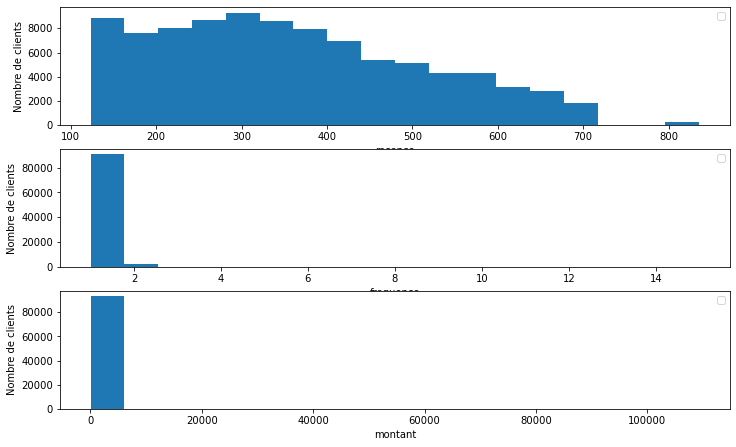

In [98]:
# histogramme de RFM
plt.figure(1, figsize=(12, 10))

for i, col in enumerate(rfm_results):
    if rfm_results[col].dtype == np.float64 or rfm_results[col].dtype == np.int64:
        plt.subplot(len(rfm_results.columns), 1, i + 1)
        plt.hist(rfm_results[col], bins=int(2 + np.log2(len(rfm_results))))
        plt.ylabel("Nombre de clients")
        plt.xlabel(col)
        plt.legend()
plt.show()

C:\Users\DELL LATITUDE 7470\Documents\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL LATITUDE 7470\Documents\Anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\DELL LATITUDE 7470\Documents\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL LATITUDE 7470\Documents\Anaconda3\lib\site-packages\seaborn\_core.py:1326: Use

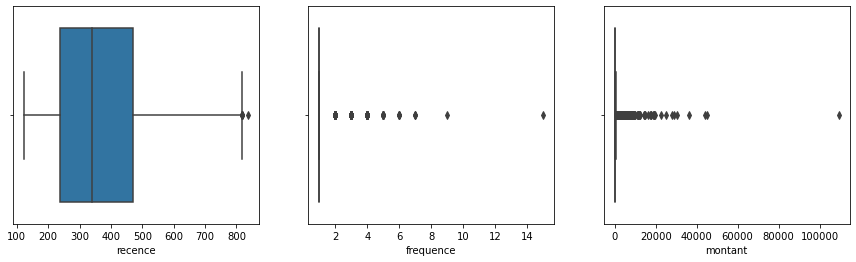

In [99]:
# boxplots
fig = plt.figure(1, figsize=(15, 4))

# Boxplot de la variable Recence
plt.subplot(131)
sns.boxplot(rfm_results["recence"], orient="vertical")

# Boxplot de la variable Frequence
plt.subplot(132)
sns.boxplot(rfm_results["frequence"], orient="vertical")

# Boxplot de la variable Monetary
plt.subplot(133)
sns.boxplot(rfm_results["montant"], orient="vertical")
plt.show()

D'après l'histogramme et les boxplots , nous remarquons la présence des outliers; Nous allons pas les supprimer parce que nous penseon que c'est tout à fait normal d'avoir un déphasage entre fréquence d'achat et montants à payer par chaque client. Dans le but d'améliorer la visibilité de toutes les données, nous allons appliquer le passage en log pour les variables frequence et montant.

Remarques:  
- La majorité des clients passe une seule commande (fréquence).
- en moyenne, les valeurs de commandes sont égales à 207. Cette variable suit une distribution normale après le passage en log. 
- La période de récence varie entre 118 et 847 jours


#### Attribution des notes
Dans cette partie, nous allons attribuer une note à chaque client et pour chaque composante de RFM. cette note varie de 1 à 4. Puisque frequence et montant sont des variables à maximiser, alors plus F ou M est élevée, plus la note est élevée , et vice-versa. Puisque Récence est une variable à minimiser, alors moins R est élevé, plus la note est élevée.  
 Nous allons attribuer une note à F et M à chaque quartile de l'intervalle d'une variable comme suit:  
   - note =1 pour le premier quartile
   - note =2 pour le deuxième quartile
   - note =3 pour le troisième quartile
   - note =4 pour le quatrième quartile  
 
 Nous allons attribuer une note à R à chaque quartile de l'intervalle d'une variable comme suit:  
   - note =4 pour le premier quartile
   - note =3 pour le deuxième quartile
   - note =2 pour le troisième quartile
   - note =1 pour le quatrième quartile

In [100]:
def r_score(x, quintiles):
    """
    Attribut une note entre 1 et 4 suivant l'emplacement de x par
    rapport aux quartiles. Plus la 'recence' est faible, plus la note
    est élevé
    x(float): valeur
    """

    if x <= quintiles["recence"][0.25]:
        return 4
    elif x <= quintiles["recence"][0.5]:
        return 3
    elif x <= quintiles["recence"][0.75]:
        return 2
    else:
        return 1

In [101]:
def fm_score(x, quintiles, c):
    """
     Attribut une note entre 1 et 4 suivant l'emplacement de x par
    rapport aux quartiles. Plus la 'frequence' ou montant est élevé, plus la note
    est élevée
    x(float): valeur
    """

    if x <= quintiles[c][0.25]:
        return 1
    elif x <= quintiles[c][0.5]:
        return 2
    elif x <= quintiles[c][0.75]:
        return 3
    else:
        return 4

In [102]:
def calculate_quantile(rfm_results):
    """
    Calcul des quantiles pour chaque variable Recence, Frequence et Montant
    puis attribut un score (fm_score et r_score) suivant la valeur
    des variables de chaque individu
    rfm_results(pd.DataFrame): présente les colonnes Recence, Frequence et Montant
    """
    quintiles = rfm_results[['recence',
                     'frequence',
                     'montant']].quantile([.25, .5, .75]).to_dict()

    rfm_results['R'] = rfm_results['recence'].apply(lambda x:
                                    r_score(x, quintiles))
    rfm_results['F'] = rfm_results['frequence'].apply(lambda x:
                                      fm_score(x, quintiles, 'frequence'))
    rfm_results['M'] = rfm_results['montant'].apply(lambda x:
                                     fm_score(x, quintiles, 'montant'))
    return rfm_results

In [103]:
calculate_quantile(rfm_results)

,customer_unique_id,recence,frequence,montant,R,F,M
0,0000366f3b9a7992bf8c76cfdf3221e2,234,1,141.90,4,1,3
1,0000b849f77a49e4a4ce2b2a4ca5be3f,237,1,27.19,4,1,1
2,0000f46a3911fa3c0805444483337064,660,1,86.22,1,1,2
3,0000f6ccb0745a6a4b88665a16c9f078,444,1,43.62,2,1,1
4,0004aac84e0df4da2b147fca70cf8255,411,1,196.89,2,1,3
...,...,...,...,...,...,...,...
93353,fffcf5a5ff07b0908bd4e2dbc735a684,570,1,4134.84,1,1,4
93354,fffea47cd6d3cc0a88bd621562a9d061,385,1,84.58,2,1,2
93355,ffff371b4d645b6ecea244b27531430a,691,1,112.46,1,1,2
93356,ffff5962728ec6157033ef9805bacc48,242,1,133.69,3,1,3


#### Segmentation des clients  et visualisation graphique
Nous allons créer 6 segments de clients selon RFM.

In [105]:
def segmentation_clients(rfm_results):
    """
    Retourne le segment associé au client en fonction de son score pour les
    variables R, F et M

    Paramètres:
    rfm_results(pd.DataFrame): doit contenir les colonnes R, F et M

    Return:
    str: Nom du segment
    """

    if (
        3 <= rfm_results["R"] <= 4
        and 3 <= rfm_results["F"] <= 4
        and 3 <= rfm_results["M"] <= 4
    ):
        return "Client GOLD"

    elif (
        3 <= rfm_results["R"] <= 4
        and 1 <= rfm_results["F"] <= 3
        and 1 <= rfm_results["M"] <= 3
    ):
        return "Client potentiel"

    elif 3 <= rfm_results["R"] <= 4 and rfm_results["F"] <= 1 and rfm_results["M"] <= 1:
        return "Client prometteur"

    elif (
        rfm_results["R"] <= 1
        and 2 <= rfm_results["F"] <= 4
        and 2 <= rfm_results["M"] <= 4
    ):
        return "Client en risque"

    elif rfm_results["R"] <= 1 and rfm_results["F"] <= 2 and rfm_results["M"] <= 2:
        return "Client perdu"

    else:
        return "Others"

In [106]:
# attribution des classes de clients
rfm_results["categorie"] = rfm_results.apply(segmentation_clients, axis=1)

In [107]:
rfm_results.head(10)

,customer_unique_id,recence,frequence,montant,R,F,M,categorie
0,0000366f3b9a7992bf8c76cfdf3221e2,234,1,141.90,4,1,3,Client potentiel
1,0000b849f77a49e4a4ce2b2a4ca5be3f,237,1,27.19,4,1,1,Client potentiel
2,0000f46a3911fa3c0805444483337064,660,1,86.22,1,1,2,Client perdu
3,0000f6ccb0745a6a4b88665a16c9f078,444,1,43.62,2,1,1,Others
4,0004aac84e0df4da2b147fca70cf8255,411,1,196.89,2,1,3,Others
5,0004bd2a26a76fe21f786e4fbd80607f,269,1,166.98,3,1,3,Client potentiel
6,00050ab1314c0e55a6ca13cf7181fecf,254,1,35.38,3,1,1,Client potentiel
7,00053a61a98854899e70ed204dd4bafe,305,1,838.36,3,1,4,Others
8,0005e1862207bf6ccc02e4228effd9a0,666,1,150.12,1,1,3,Others
9,0005ef4cd20d2893f0d9fbd94d3c0d97,293,1,129.76,3,1,3,Client potentiel


In [108]:
# visualisation 3D
def projection_3d_segments(rfm_results, label_categorie):
    """
    Graphique montrant les différents clients associés à leur segment/cluster respectif
    rfm_results(pd.DataFrame): Table de résultats
    label_categorie(str): nom du segment
    colors(list): liste de couleurs

    """
    fig = plt.figure(1, figsize=(20, 10))

    dx = fig.add_subplot(111, projection="3d")
    # Pour chaque segment, scatter plot des individus avec code couleur
    for i, segment in enumerate(rfm_results[label_categorie].unique()):
        dx.scatter(
            rfm_results[rfm_results[label_categorie] == segment].recence,
            rfm_results[rfm_results[label_categorie] == segment].frequence,
            rfm_results[rfm_results[label_categorie] == segment].montant,
            label=segment,
            s=50,
        )
    # Titre des axes et titre graphique
    dx.set_xlabel("Recence")
    dx.set_ylabel("Frequence")
    dx.set_zlabel("Montant")
    plt.title("Représentation 3D des différents individus dans chaque segment")

    plt.legend()
    plt.show()

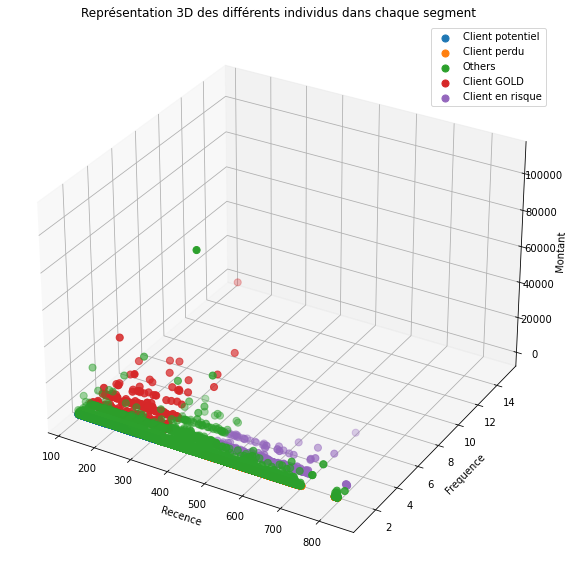

In [109]:
# Graphique 3D (x, y, z) = (Recence, Frequence, Montant)
projection_3d_segments(rfm_results, "categorie")

##### Interpretation de la segmentation

In [110]:
rfm_taille_cluster = rfm_results.groupby("categorie").agg(
    {"customer_unique_id": "count"}
)
rfm_taille_cluster

,customer_unique_id
categorie,
Client GOLD,1375
Client en risque,560
Client perdu,11858
Client potentiel,34375
Others,45190


In [111]:
# interprétation des classes des clients
rfm_results.groupby("categorie").agg({"frequence": "mean", "recence": "mean", "montant": "mean",})

,frequence,recence,montant
categorie,,,
Client GOLD,2.159273,235.184727,557.427825
Client en risque,2.082143,560.623214,432.436000
Client perdu,1.000000,573.268173,64.707096
Client potentiel,1.000000,234.227200,93.918561
Others,1.020358,402.011197,329.331699


#### Remarques et interprétations :  

- La première remarque c'est que le segment "client prometteur" n'est pas présent --> c'est un segment vide!  
- "Clients gold":  clients qui achètent toujours et avec un montant élevé. 
- "Client en risque": est celui qui a passé plusieurs cmnd avec montant élevé, mais il y a longtemps il n'a pas commandé. Donc il y a un risque de le perdre.  
- "Client potentiel" : qui a acheté récemment et F et M sont assez élevés. on a l'intention qu'il sera un client très interessant, il faut le viser en marketing.  
- "client perdu": celui dont fréquence d'achat et montant sont assez faibles. En plus ça fait longtemps qu'il n'a pas passé des commandes (récence très élevé).   

La segmentation RFM est fait manuellement, d'où c'est un peu compliqué de couvrir toutes les facettes/comportements des clients. --> 46122 clients sont tous dans le segment "autres".  

Les segments ne sont pas cohérent coté taille: on a 586 Clients en risques et 35315 Clients potentiels. 

La segmentation RFM est purement métier et ne considère pas d'autre fatures telque la distance entre client-vendeur. 

##### Conclusion:
--> Essayer une segmentation plutôt technique en utilisant les algorithmes de classification non supervisée. 

In [112]:
# exportation du dataframe qui contient toutes les variables
df.to_csv("df.csv")

# exportation du dataframe qui contient uniquement les features  RFM afin de faire
# la liaison et la comparaison avec les autres modèles de segmentation
rfm_results.to_csv("rfm_results.csv")